# Data was taken from https://www.kaggle.com/mlg-ulb/creditcardfraud

# Quick Description

The datasets contains transactions made by credit cards in September 2013 by european cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.kernel_approximation import Nystroem
from sklearn.linear_model import SGDClassifier


In [2]:
data = pd.read_csv('kaggle datasets download -d mlg-ulb/creditcardfraud', sep = ',')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Data Exploration plan:

As first step for our Data Exploration I will check the null values and briefly information about dataset. 
<br>Afterwards we will look on the prooprtion of classes in our data set (**column "Class"**). 

In [3]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [4]:
data.shape

(284807, 31)

In [5]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
print("No fraud cases(count, percentile): {count}, {percentile}%".format(count = data.Class.value_counts()[0],
      percentile = round(data.Class.value_counts()[0]/len(data) * 100, 2)))
print("Fraud cases(count, percentile): {count}, {percentile}%".format(count = data.Class.value_counts()[1], 
      percentile = round(data.Class.value_counts()[1]/len(data) * 100, 2)))

No fraud cases(count, percentile): 284315, 99.83%
Fraud cases(count, percentile): 492, 0.17%


## Scaling and undersampling of data

Robust scaler was choosen because of outliers, which I notice in **data.describe()** part

In [7]:
rob_scaler = RobustScaler()

data['scaled_amount'] = rob_scaler.fit_transform(data['Amount'].values.reshape(-1, 1))
data['scaled_time'] = rob_scaler.fit_transform(data['Time'].values.reshape(-1, 1))

data.drop(['Time','Amount'], axis=1, inplace=True)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.783274,-0.994983
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.269825,-0.994983
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.983721,-0.994972
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.418291,-0.994972
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.670579,-0.994960


In [8]:
data = data.sample(frac=1)

fraud_data = data.loc[data['Class'] == 1]
non_fraud_data = data.loc[data['Class'] == 0][:492]

normal_distributed_data = pd.concat([fraud_data, non_fraud_data])

new_data = normal_distributed_data.sample(frac=1, random_state=42)

new_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
152339,0.144082,0.152894,-0.228949,-1.343209,2.303455,4.073235,-0.526623,1.060033,1.950880,-1.178530,...,0.620241,-0.049436,0.654833,-0.297782,-0.303768,0.072179,0.002620,0,-0.084539,0.147899
26802,0.539276,1.554890,-2.066180,3.241617,0.184736,0.028330,-1.515521,0.537035,-1.999846,-2.133176,...,0.111955,-0.305225,-1.053835,0.771175,0.240878,0.418435,0.232170,1,-0.041640,-0.592535
274486,-0.033662,0.706265,0.513903,-0.552872,0.023186,-1.166397,0.794877,0.008516,-0.062381,-0.187771,...,-0.506190,0.144827,0.491387,-0.658034,0.092109,0.232678,0.088772,0,-0.282540,0.955662
123238,1.140208,1.156431,-1.471578,2.076278,0.774809,-1.002532,0.264948,0.013162,0.248835,-2.100667,...,-0.866812,-0.121583,-0.356109,0.634573,-0.306311,0.094087,0.121065,1,-0.293440,-0.092048
30442,-3.896583,4.518355,-4.454027,5.547453,-4.121459,-1.163407,-6.805053,2.928356,-4.917130,-6.600461,...,0.920021,-0.151104,0.011007,0.080303,0.412191,0.635789,0.501050,1,-0.243695,-0.572916


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


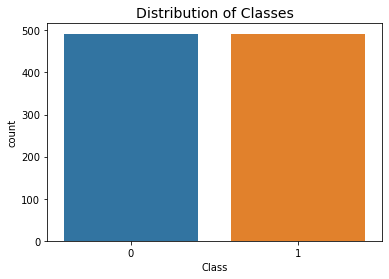

In [9]:
sns.color_palette("viridis", as_cmap=True)
sns.countplot('Class', data=new_data)
plt.title('Distribution of Classes', fontsize=14)
plt.show()

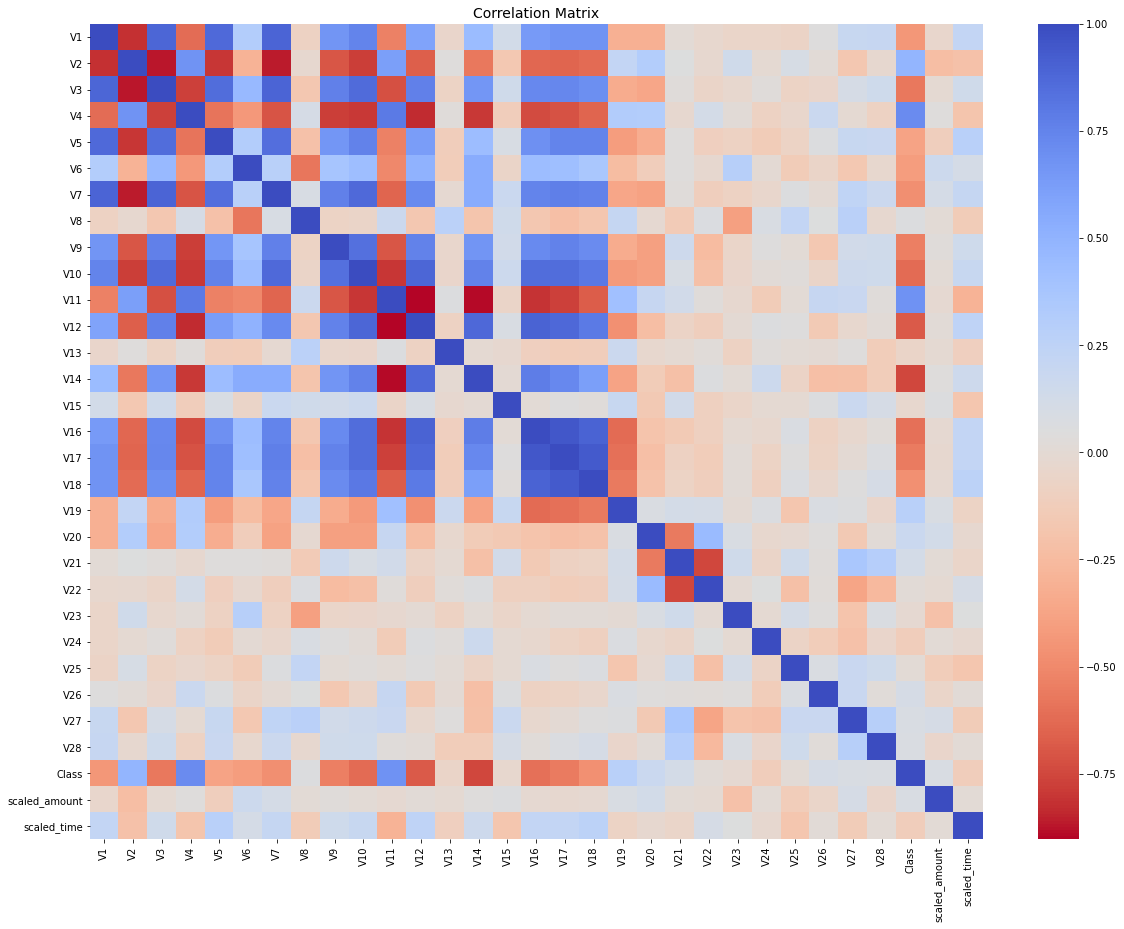

In [10]:
fig, ax = plt.subplots(1, 1, figsize = (20, 15))

sns.heatmap(new_data.corr(), cmap='coolwarm_r', annot_kws={'size':20})
ax.set_title('Correlation Matrix', fontsize=14)
plt.show()

## Exploration:
1. The dataset does not have any missing values, so there is no need in filling missing values
2. The dataset are highly skewed to No fraud cases. Upsampling will be a way to balans dataset.
3. Also I made a random undersampling, for balancing data.
4. From correlation matrix we can see which features is correlated positively or negatively.

# Classifiers

Here I train three different classifiers using **Logistic Regression** as a baseline, **SGDC** through Nystroem kernal approximation and ensembled model(**Random Forest**)

In [11]:
X = new_data.drop('Class', axis=1)
y = new_data['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [12]:
lr = LogisticRegression(penalty='l1', solver='liblinear').fit(X_train, y_train)

rf = RandomForestClassifier(oob_score=True, 
                            random_state=42, 
                            warm_start=True,
                            n_jobs=-1, n_estimators = 100).fit(X_train, y_train)
kwargs = {'kernel': 'rbf'}
nystroem = Nystroem(**kwargs)
X_transformed_train = nystroem.fit_transform(X_train) # For random SGDC
X_transformed_test = nystroem.transform(X_test)
sgdc = SGDClassifier().fit(X_transformed_train, y_train)


In [13]:
y_pred = list()

coeff_labels = ['Logistic Regression', 'SGDC', 'Random Forest']
coeff_models = [lr, sgdc, rf]

for lab,mod in zip(coeff_labels, coeff_models):
    print(lab)
    if(lab == 'SGDC'):
        y_pred.append(pd.Series(mod.predict(X_transformed_test), name=lab))
        continue;
    y_pred.append(pd.Series(mod.predict(X_test), name=lab))
    
y_pred = pd.concat(y_pred, axis=1)
y_pred

Logistic Regression
SGDC
Random Forest


,Logistic Regression,SGDC,Random Forest
0,1,1,1
1,1,1,1
2,0,0,0
3,1,1,1
4,1,1,1
...,...,...,...
291,0,0,0
292,1,0,0
293,1,1,1
294,0,0,0


In [14]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.preprocessing import label_binarize

metrics = list()
cm = dict()

for lab in coeff_labels:

    # Preciision, recall, f-score from the multi-class support function
    precision, recall, fscore, _ = score(y_test, y_pred[lab], average='weighted')
    
    # The usual way to calculate accuracy
    accuracy = accuracy_score(y_test, y_pred[lab])
    
    # Last, the confusion matrix
    cm[lab] = confusion_matrix(y_test, y_pred[lab])
    
    metrics.append(pd.Series({'precision':precision, 'recall':recall, 
                              'fscore':fscore, 'accuracy':accuracy}, 
                             name=lab))

metrics = pd.concat(metrics, axis=1)

In [15]:
metrics

,Logistic Regression,SGDC,Random Forest
precision,0.926179,0.922367,0.938671
recall,0.925676,0.922297,0.935811
fscore,0.925758,0.922321,0.935948
accuracy,0.925676,0.922297,0.935811


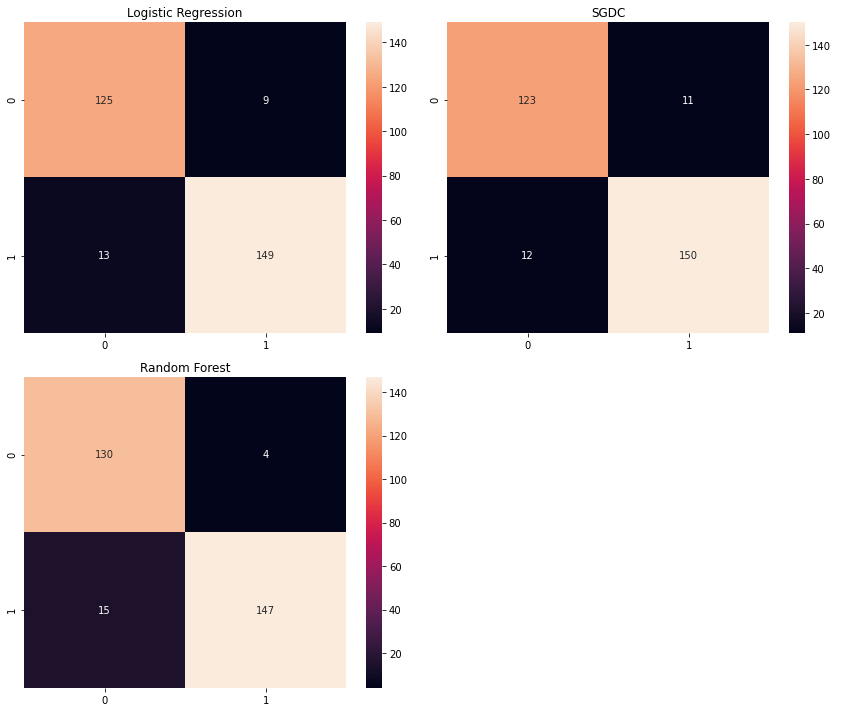

In [16]:
fig, axList = plt.subplots(nrows=2, ncols=2)
axList = axList.flatten()
fig.set_size_inches(12, 10)

axList[-1].axis('off')

for ax,lab in zip(axList[:-1], coeff_labels):
    sns.heatmap(cm[lab], ax=ax, annot=True, fmt='d');
    ax.set(title=lab);
    
plt.tight_layout()

## Summary of classifiers:

There is clearly seen that Random Forest classified better in terms of all metrics, while SGDC classifier predicted much worse than Logistic Regression(3 % for card frauding is very high mistake). 

# Suggestions for next steps

As further research, I propose construction GridSearchCV which will tune our models better. I just choosed the number for hyperparamters, that I preffered. Also anomaly detection will increase the number of true classified data points. 